# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import r2_score

# Make a dataset

In [29]:
X, y = make_regression(n_samples=1000, n_features=1, noise=30, random_state=42)

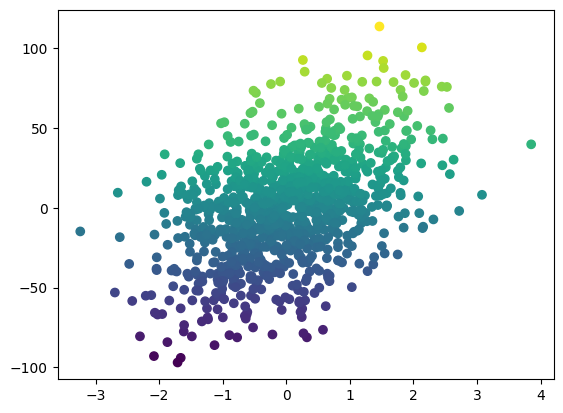

In [30]:
plt.scatter(X, y, c=y)

# Train test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply LinearRegression

In [32]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train)
r2_score(y_test, reg1.predict(X_test))

0.20004460696632298

In [33]:
reg1.coef_, reg1.intercept_

(array([16.65307796]), -0.2775030809133809)

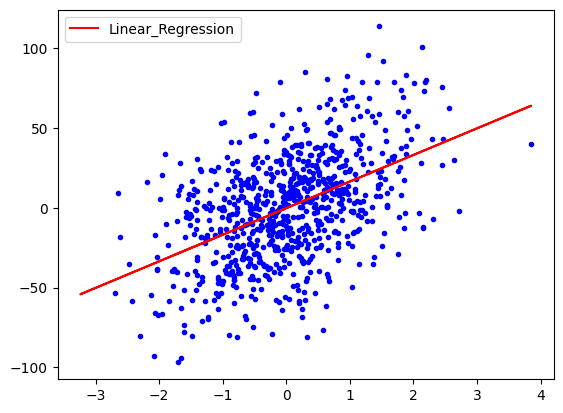

In [40]:
plt.plot(X_train,y_train,'b.')
# plt.plot(X_train,reg1.predict(X_train),'r.', label='Linear_Regression')
plt.plot(X,reg1.predict(X),color='red',label='Linear_Regression')
plt.legend()

# Apply Ridge Regression

In [44]:
reg2 = Ridge(alpha=50)
reg2.fit(X_train, y_train)
r2_score(y_test, reg2.predict(X_test))

0.2011503780462991

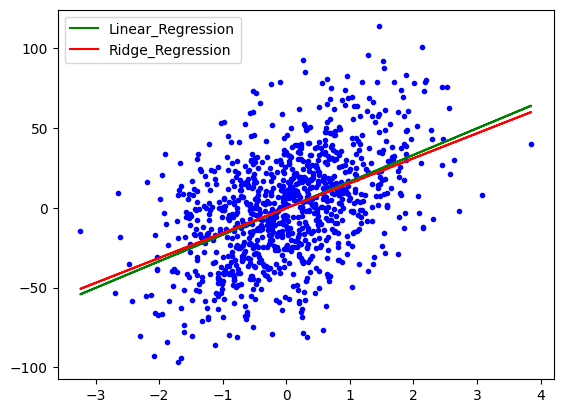

In [46]:
plt.plot(X,y,'b.')
plt.plot(X, reg1.predict(X),color='green',label='Linear_Regression')
plt.plot(X,reg2.predict(X),color='red',label='Ridge_Regression')
plt.legend()

In [49]:
reg2.coef_, reg2.intercept_

(array([15.6127283]), -0.2611649901295774)

# Custom Ridge Regression

In [47]:
class CustomRidge:
    def __init__(self, alpha=1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        num = 0
        dnum = 0
        y_mean = np.mean(y_train)
        x_mean = np.mean(X_train)

        for i in range(X_train.shape[0]):
          num = num + (y_train[i]-y_mean)*(X_train[i]-x_mean)
          dnum = dnum + (X_train[i] - x_mean)**2
        self.coef_ = num/(dnum + self.alpha)
        self.intercept_ = y_mean - (self.coef_ * x_mean)

    def predict(self, X_test):
        return self.intercept_ + np.dot(X_test, self.coef_)

In [48]:
reg3 = CustomRidge(alpha=50)
reg3.fit(X_train, y_train)
r2_score(y_test, reg3.predict(X_test))

0.2011503780462992

In [50]:
reg3.coef_, reg3.intercept_

(array([15.6127283]), array([-0.26116499]))

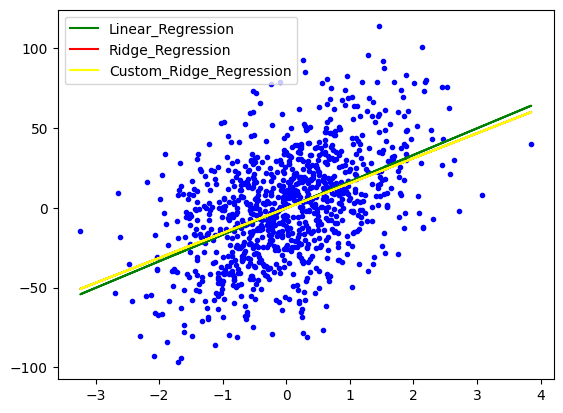

In [57]:
plt.plot(X,y,'b.')
plt.plot(X, reg1.predict(X),color='green',label='Linear_Regression')
plt.plot(X,reg2.predict(X),color='red',label='Ridge_Regression')
plt.plot(X,reg3.predict(X),color='yellow',label='Custom_Ridge_Regression')
plt.legend()